In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv('/content/housing_data exam.csv')
df.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200


In [ ]:
df.shape

(20640, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16724 entries, 2 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  16724 non-null  int64  
 1   total_rooms         16724 non-null  int64  
 2   total_bedrooms      16724 non-null  float64
 3   population          16724 non-null  int64  
 4   households          16724 non-null  int64  
 5   median_income       16724 non-null  float64
 6   median_house_value  16724 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.0 MB


# (1)Ans:

In [ ]:
shape_before = df.shape

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
shape_after = df.shape

In [ ]:
print(f"Shape before cleaning: {shape_before}")
print(f"Shape after cleaning: {shape_after}")

Shape before cleaning: (20640, 7)
Shape after cleaning: (20433, 7)


# 2.Ans:

In [ ]:
# Print descriptive statistics
print(df.describe())

       housing_median_age   total_rooms  total_bedrooms    population  \
count        20433.000000  20433.000000    20433.000000  20433.000000   
mean            28.633094   2636.504233      537.870553   1424.946949   
std             12.591805   2185.269567      421.385070   1133.208490   
min              1.000000      2.000000        1.000000      3.000000   
25%             18.000000   1450.000000      296.000000    787.000000   
50%             29.000000   2127.000000      435.000000   1166.000000   
75%             37.000000   3143.000000      647.000000   1722.000000   
max             52.000000  39320.000000     6445.000000  35682.000000   

         households  median_income  median_house_value  
count  20433.000000   20433.000000        20433.000000  
mean     499.433465       3.871162       206864.413155  
std      382.299226       1.899291       115435.667099  
min        1.000000       0.499900        14999.000000  
25%      280.000000       2.563700       119500.000000  


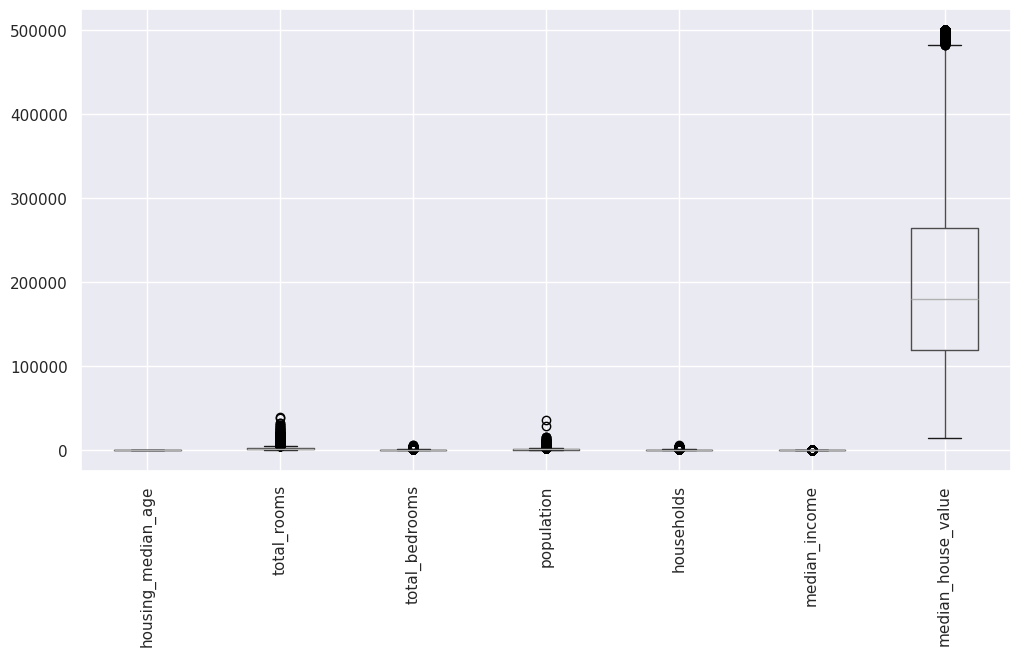

In [ ]:
# before removing outlire
df.select_dtypes(include=['number']).boxplot(figsize=(12,6))
plt.xticks(rotation=90)
plt.show()

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for col in df.select_dtypes(include=['number']).columns:
    df = remove_outliers(df, col)


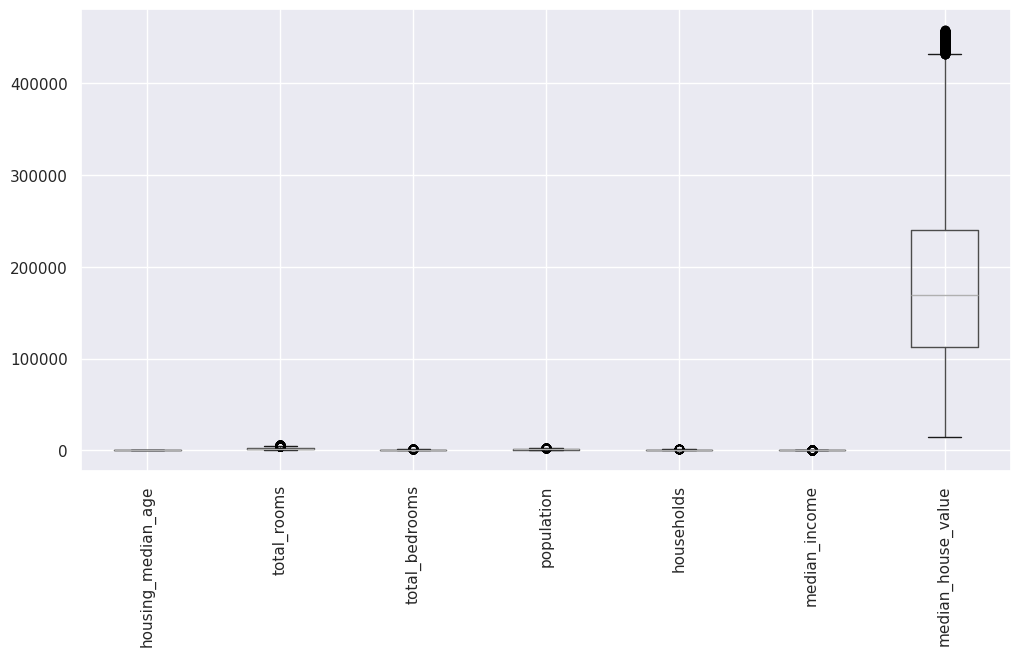

In [ ]:
#After removing outlire
df.select_dtypes(include=['number']).boxplot(figsize=(12,6))
plt.xticks(rotation=90)
plt.show()

# 3.Ans:

In [ ]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

# 4.Ans:

In [ ]:
df.shape

(16724, 7)

In [ ]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 1.8285838 , -0.59056911, -1.1807508 , -1.18967046, -1.19538587,
         2.54406905],
       [ 1.8285838 , -0.77908954, -0.95625533, -1.07666517, -0.96948557,
         1.42800115],
       [ 1.8285838 , -0.43428275, -0.73175985, -1.06390651, -0.75434243,
         0.18569029],
       ...,
       [-1.03591594,  0.17816443,  0.29094176, -0.25828814,  0.18153024,
        -1.29811379],
       [-0.95407309, -0.20669073, -0.08820616, -0.74311729, -0.27027036,
        -1.18251783],
       [-1.11775879,  0.6968398 ,  0.94447303,  0.43432494,  0.70325236,
        -0.82204096]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = r2_score(y_test, y_pred)


print("Linear Regression Model Accuracy (R² Score):", accuracy)

Linear Regression Model Accuracy (R² Score): 0.5371322890885921


# 5.Ans

In [ ]:
# k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Initialize models
linear_model = LinearRegression()
svr_model = SVR(kernel='rbf')

In [ ]:
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

In [ ]:
svr_model.score(X_test, y_test)

-0.0270047389522301

In [ ]:
linear_scores = cross_val_score(linear_model, X_scaled, y, cv=kf, scoring='r2')
svr_scores = cross_val_score(svr_model, X_scaled, y, cv=kf, scoring='r2')

In [ ]:
print("Linear Regression Average R² Score:", np.mean(linear_scores))
print("Support Vector Regression Average R² Score:", np.mean(svr_scores))

Linear Regression Average R² Score: 0.5344025899056958
Support Vector Regression Average R² Score: -0.02260954983781378
